# Libraries and Data

In [1]:
# Libraries
import numpy as np
import pandas as pd

In [5]:
# Load the data
df = pd.read_csv('CreditCard.csv').dropna()
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


# Data preparation

In [7]:
# Transform objects into numerical data
df = pd.get_dummies(data = df,
                    drop_first=True)
df.head(2)

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes
0,0,37.66667,4.52,0.033270,124.983300,3,54,1,12,1,1,0
1,0,33.25000,2.42,0.005217,9.854167,3,34,1,13,1,0,0


In [8]:
# Summary Statistics
df.describe()

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967,0.775588,0.440485,0.068992
std,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812,0.417353,0.496634,0.253536
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000,1.000000,0.000000,0.000000
75%,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000,1.000000,1.000000,0.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000,1.000000,1.000000,1.000000


In [17]:
# Isolate X and y
y = df['card_yes']
X = df.drop(columns=['card_yes'])

X.head(1)

,reports,age,income,share,expenditure,dependents,months,majorcards,active,owner_yes,selfemp_yes
0,0,37.66667,4.52,0.03327,124.9833,3,54,1,12,1,0


In [18]:
# Split into training and test Set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1502, stratify=y)

# Random Forest

In [19]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=300, random_state=1502)

model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=1502)

In [20]:
preds = model.predict(X_test)
preds

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1],
      dtype=uint8)

In [24]:
# Model Assesment - Classification report
from sklearn.metrics import classification_report, accuracy_score, f1_score

print(classification_report(y_test, preds))


              precision    recall  f1-score   support

           0       0.94      0.98      0.96        59
           1       1.00      0.98      0.99       205

    accuracy                           0.98       264
   macro avg       0.97      0.98      0.97       264
weighted avg       0.98      0.98      0.98       264



In [25]:
# Specific Assesments
print(f"Accuracy of model was: {round(accuracy_score(y_test, preds) * 100, 2)}%")
print(f"F1 score of model was: {round(f1_score(y_test, preds) * 100, 2)}%")

Accuracy of model was: 98.11%
F1 score of model was: 98.77%


# Feature Importance

<AxesSubplot:>

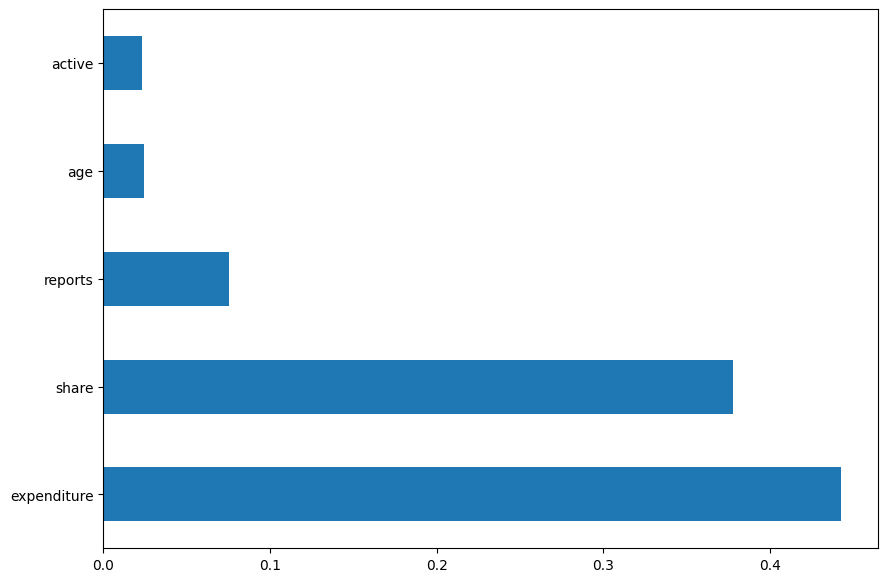

In [27]:
importance = pd.Series(model.feature_importances_,
                       index=X_train.columns.values)

importance.nlargest(5).plot(kind='barh', figsize=(10,7))

# Parameter Tuning

In [35]:
# Parameter Grid
from sklearn.model_selection import ParameterGrid
param_grid = {'n_estimators': range(50, 500, 50)}
grid = ParameterGrid(param_grid=param_grid)
grid

In [31]:
# Parameter Tuning

# List where to store the results
f1score = []

# Loop
for params in grid:
    # Build the model
    model = RandomForestClassifier(n_estimators=params['n_estimators'],
                                   random_state=1502)
    model.fit(X_train, y_train)

    # Predictions
    preds = model.predict(X_test)

    # Acuraccy Assesment
    f1 = f1_score(y_test, preds)

    # Store results
    f1score.append(f1)

In [34]:
# Best Parameters
best_params = grid[np.argmax(f1)]
print(best_params)

{'n_estimators': 50}


# Challenge Time - Predict Customer Income

## Libraries and Data

In [36]:
# Libraries
import pandas as pd
import numpy as np

In [74]:
# Data
data = pd.read_csv('marketing_campaign.csv').dropna()
data.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,...,10,4,7,0,0,0,0,0,0,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,...,1,2,5,0,0,0,0,0,0,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,...,2,10,4,0,0,0,0,0,0,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,...,0,4,6,0,0,0,0,0,0,0
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,...,3,6,5,0,0,0,0,0,0,0


## Data Prep

In [75]:
data.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [76]:
df = data.drop(columns=['Unnamed: 0', 'ID', 'Dt_Customer', 'Recency', 'MntWines'
                        ,'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts',
                        'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
                        'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                        'AcceptedCmp2', 'Complain', 'Response'])

df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,NumDealsPurchases
0,1957,Graduation,Single,58138.0,0,0,3
1,1954,Graduation,Single,46344.0,1,1,2
2,1965,Graduation,Together,71613.0,0,0,1
3,1984,Graduation,Together,26646.0,1,0,2
4,1981,PhD,Married,58293.0,1,0,5


In [61]:
df_prods = data.drop(columns=['Unnamed: 0', 'ID', 'Dt_Customer', 'Recency',
                        'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
                        'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                        'AcceptedCmp2', 'Complain', 'Response'])
df_prods.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases
0,1957,Graduation,Single,58138.0,0,0,635,88,546,172,88,3
1,1954,Graduation,Single,46344.0,1,1,11,1,6,2,1,2
2,1965,Graduation,Together,71613.0,0,0,426,49,127,111,21,1
3,1984,Graduation,Together,26646.0,1,0,11,4,20,10,3,2
4,1981,PhD,Married,58293.0,1,0,173,43,118,46,27,5


In [65]:
for label in df.columns:
    print(f"{label} is datatype {type(df[label][0])}")



Year_Birth is datatype <class 'numpy.int64'>
Education is datatype <class 'str'>
Marital_Status is datatype <class 'str'>
Income is datatype <class 'numpy.float64'>
Kidhome is datatype <class 'numpy.int64'>
Teenhome is datatype <class 'numpy.int64'>
NumDealsPurchases is datatype <class 'numpy.int64'>


In [54]:
print(df.Education.value_counts())
print(df.Marital_Status.value_counts())

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


In [77]:
df['PostGrad'] = np.where((df['Education'] == 'Graduation ') |
                           (df['Education'] == 'Basic'), 0, 1)
df['Marital_Status'].replace('YOLO', 'Single', inplace=True)
df['Marital_Status'].replace('Absurd', 'Single', inplace=True)
df['Marital_Status'].replace('Alone', 'Single', inplace=True)
df = df.drop(columns=['Education'])


In [92]:
df_prods['PostGrad'] = np.where((df_prods['Education'] == 'Graduation ') |
                           (df_prods['Education'] == 'Basic'), 0, 1)
df_prods['Marital_Status'].replace('YOLO', 'Single', inplace=True)
df_prods['Marital_Status'].replace('Absurd', 'Single', inplace=True)
df_prods['Marital_Status'].replace('Alone', 'Single', inplace=True)
df_prods = df_prods.drop(columns=['Education'])

In [79]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Year_Birth,Income,Kidhome,Teenhome,NumDealsPurchases,PostGrad,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1957,58138.0,0,0,3,1,0,1,0,0
1,1954,46344.0,1,1,2,1,0,1,0,0
2,1965,71613.0,0,0,1,1,0,0,1,0
3,1984,26646.0,1,0,2,1,0,0,1,0
4,1981,58293.0,1,0,5,1,1,0,0,0


In [93]:
df_prods = pd.get_dummies(df_prods, drop_first=True)

In [94]:
df['Year_Birth'] = 2023 - df['Year_Birth']
df.head()

,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,PostGrad,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,66,58138.0,0,0,635,88,546,172,88,3,1,0,1,0,0
1,69,46344.0,1,1,11,1,6,2,1,2,1,0,1,0,0
2,58,71613.0,0,0,426,49,127,111,21,1,1,0,0,1,0
3,39,26646.0,1,0,11,4,20,10,3,2,1,0,0,1,0
4,42,58293.0,1,0,173,43,118,46,27,5,1,1,0,0,0


In [95]:
from sklearn.model_selection import train_test_split
y = df_prods['Income']
X = df_prods.drop(columns=['Income'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1502)

## Random Forest 

In [119]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(40, random_state=1502, verbose=True)

model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.3s finished


RandomForestRegressor(n_estimators=40, random_state=1502, verbose=True)

## Model Assesments

In [120]:
preds = model.predict(X_test)
preds

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished


array([ 70100.95 ,  21051.3  ,  57092.325,  48590.55 ,  48404.35 ,
        44902.625,  46443.7  ,  26330.275,  91670.45 ,  18690.   ,
        66241.475,  24531.475,  48841.175,  53569.125,  74565.725,
        31649.9  ,  50899.15 ,  40744.325,  38508.475,  22844.55 ,
        33166.675,  11578.325,  33149.375,  52918.475,  31375.65 ,
        32177.7  ,  43814.525,  30311.625,  74443.5  ,  89233.075,
        64332.7  ,  44519.95 ,  36523.775,  37624.875,  34561.425,
        38121.375,  58150.825,  37803.325,  73854.125,  21549.85 ,
        41912.475,  27697.3  ,  21126.7  ,  19270.625,  40313.775,
        71410.325,  67095.55 ,  55445.4  ,  50926.775,  74201.375,
        84820.75 ,  75610.95 ,  61999.225,  67962.4  ,  48621.05 ,
        73498.   ,  76828.075,  77204.275,  43273.9  ,  46291.8  ,
        50694.35 ,  17275.1  ,  81211.2  ,  54770.35 ,  41938.925,
        57998.25 ,  53387.775,  47293.275,  45247.225,  78524.475,
        21250.15 ,  73552.25 ,  29941.95 ,  42266.875,  59828.

In [121]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, preds)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean Absolute Error: 7048.887556306306
Mean Squared Error: 187107662.0902013
Root Mean Squared Error: 13678.730280629166
R-squared: 0.6151191196932422


# Feature Importance

<AxesSubplot:>

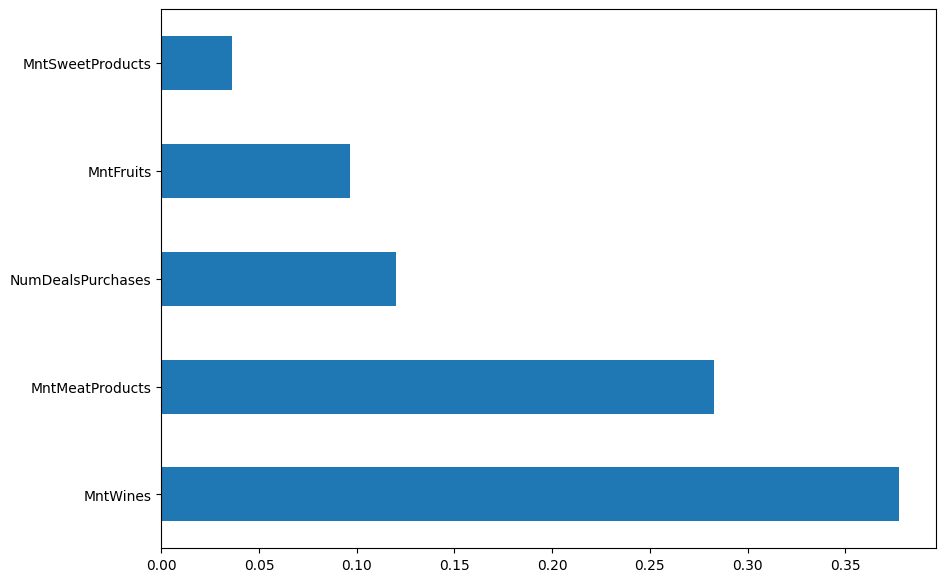

In [101]:
# Importance plot
importance = pd.Series(model.feature_importances_,
                       index=X_train.columns.values)
importance.nlargest(5).plot(kind='barh', figsize=(10,7))

# Parameter Tuning

In [117]:
# Parameter Grid
from sklearn.model_selection import ParameterGrid
param_grid = {'n_estimators': range(10, 50, 5)}
grid = ParameterGrid(param_grid)

In [118]:
# Parameter Tuning
mae = []

# Start the loop
for params in grid:
    # model building
    model = RandomForestRegressor(n_estimators=params['n_estimators'],
                                  random_state=1502)
    model.fit(X_train, y_train)

    #preds
    preds = model.predict(X_test)

    # Asess Acuraccy
    error = mean_absolute_error(y_test, preds)

    # Append to list
    mae.append(error)

# best parameters
best_param = grid[np.argmin(mae)]
print(best_param)

{'n_estimators': 40}
